# Modification Study

## 0. Setup

In [3]:
import os, sys
from tqdm.notebook import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DIR_PATH = 'F:/20210730_samples'
SAVE_PATH = os.path.join(DIR_PATH, 'numpy')
CT_PATH = os.path.join(SAVE_PATH, 'CT_target')
PT_PATH = os.path.join(SAVE_PATH, 'PT_resize')

## 1. Voxel Analysis

In [5]:
# Voxel Loading...

CT_list = os.listdir(CT_PATH)
PT_list = os.listdir(PT_PATH)

sample_num = len(os.listdir(CT_PATH)) # extract sample #
vol_shape = np.load(os.path.join(CT_PATH, CT_list[0])).shape # extract data shape
CT_voxel = np.zeros([sample_num, *vol_shape])
PT_voxel = np.zeros([sample_num, *vol_shape])

for i in range(sample_num):
    CT_voxel[i] = np.load(os.path.join(CT_PATH, CT_list[i]))
    PT_voxel[i] = np.load(os.path.join(PT_PATH, PT_list[i]))

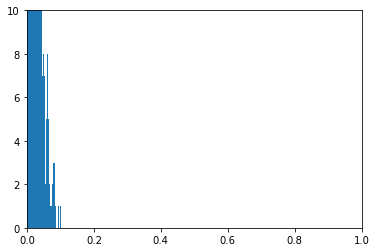

In [61]:
plt.hist(PT_voxel[6, 64].reshape(-1), bins=50)
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.show()

In [51]:
PT_voxel.shape

(16, 128, 128, 256)